In [1]:
import geopandas as gpd
import pandas as pd

import mapillary as mly
import json

import glob




### netzwerk einlesen

In [2]:

set_date = "250805" 

cycleways=gpd.read_parquet(f"processed_osm_files/processed_cycleways_germany_{set_date}.parquet")
motorways=gpd.read_parquet(f"processed_osm_files/processed_motorways_germany_{set_date}.parquet")



In [3]:
len(cycleways)

7427649

In [4]:
len(motorways)

69509

In [5]:
cycleways.columns

Index(['osm_id', 'highway', 'bicycle', 'bicycle_forward', 'bicycle_backward',
       'cycleway', 'cycleway_left', 'cycleway_right', 'cycleway_both',
       'cycleway_lane', 'cycleway_track', 'cycleway_opposite',
       'cycleway_shared_lane', 'sidewalk_right_bicycle',
       'sidewalk_left_bicycle', 'sidewalk_both_bicycle', 'maxspeed',
       'maxspeed_conditional', 'maxspeed_backward', 'maxspeed_forward',
       'maxspeed_type', 'name', 'ref', 'surface', 'width', 'geometry'],
      dtype='object')

In [6]:
filtered_cycleways = cycleways[
    (cycleways["bicycle"].isin(["designated"])) |
    (cycleways["bicycle_backward"].isin(["designated"])) |
    (cycleways["bicycle_forward"].isin(["designated"])) |
    (cycleways["highway"].isin(["cycleway"])) |
    (cycleways["cycleway"].notnull() & (cycleways["cycleway"] != "no")) |
    (cycleways["cycleway_left"].notnull() & (cycleways["cycleway_left"] != "no")) |
    (cycleways["cycleway_right"].notnull() & (cycleways["cycleway_right"] != "no")) |
    (cycleways["cycleway_both"].notnull() & (cycleways["cycleway_both"] != "no")) |
    (cycleways["cycleway_lane"].notnull() & (cycleways["cycleway_lane"] != "no")) |
    (cycleways["cycleway_track"].notnull() & (cycleways["cycleway_track"] != "no")) |
    # (cycleways["sidewalk"].isin(["designated"])) |  TODO: add "sidewalk" in ini file
    (cycleways["sidewalk_right_bicycle"].isin(["designated"])) |
    (cycleways["sidewalk_left_bicycle"].isin(["designated"])) |
    (cycleways["sidewalk_both_bicycle"].isin(["designated"])) 
]
len(filtered_cycleways)

744844

In [7]:
filtered_cycleways.highway.value_counts()

highway
path                        306201
secondary                   111796
cycleway                     88854
tertiary                     77467
primary                      59893
residential                  41770
footway                      18706
unclassified                 12047
track                        11936
service                       7107
living_street                 1653
secondary_link                1593
primary_link                  1377
tertiary_link                  911
construction                   740
trunk                          630
pedestrian                     583
trunk_link                     572
steps                          292
proposed                        94
motorway_link                   58
platform                        49
planned                         11
road                            11
busway                          10
bridleway                        2
p<<                              1
bus_stop                         1
motorway    

In [8]:


## TRAFFFIC SIGNS
# https://www.mapillary.com/developer/api-documentation/traffic-signs?locale=

# Unterschiedliche Verkehrszeichen in Deutschland für Radwege

# https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:237
de_237="regulatory--bicycles-only--g1"

# https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:240
de_240="regulatory--shared-path-pedestrians-and-bicycles--g1"

# https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:241-30
de_241_30="regulatory--dual-path-bicycles-and-pedestrians--g1"

# https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:241-31
de_241_31="regulatory--dual-path-pedestrians-and-bicycles--g1"


# ggf. noch  "complementary--except-bicycles--g1" https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:1022-10



#mapillary_trafficsigns = gpd.read_parquet("../preprocessing/mapillary_map-feature-data_ger_2025-06-07.parquet") ## -> 184120 features
#mapillary_trafficsigns = gpd.read_parquet("../preprocessing/mapillary_map-feature-data_ger_2025-07-30.parquet") ## -> 213732 features

# Find all parquet files in the tile_cache folder (per state)
parquet_files = glob.glob("../../output/*.parquet")

# Read all files and concatenate into one GeoDataFrame
mapillary_trafficsigns = gpd.GeoDataFrame(
    pd.concat([gpd.read_parquet(f) for f in parquet_files], ignore_index=True),
    crs=gpd.read_parquet(parquet_files[0]).crs
)






# Schilder in Germany
mapillary_trafficsigns_cw=mapillary_trafficsigns[mapillary_trafficsigns.value.isin([de_237, de_240, de_241_30, de_241_31])]

mapillary_trafficsigns_cw=mapillary_trafficsigns_cw.drop_duplicates(subset=['id'])


mapillary_trafficsigns_cw

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
11,POINT (9.73987 53.58629),2020-05-27,175673757806420,2020-05-27,regulatory--bicycles-only--g1,8635,5292
20,POINT (9.73963 53.58636),2019-06-30,974277483315026,2019-06-30,regulatory--bicycles-only--g1,8635,5292
175,POINT (9.74737 53.58621),2018-06-07,3006290302936408,2018-06-07,regulatory--bicycles-only--g1,8635,5292
206,POINT (9.7375 53.58509),2018-11-23,1117349228741797,2018-11-23,regulatory--shared-path-pedestrians-and-bicycl...,8635,5292
241,POINT (9.73782 53.58519),2019-01-26,468313554240132,2025-05-08,regulatory--shared-path-pedestrians-and-bicycl...,8635,5292
...,...,...,...,...,...,...,...
6088646,POINT (8.96304 53.05724),2018-03-18,298146151981256,2021-08-29,regulatory--dual-path-bicycles-and-pedestrians...,8599,5332
6088660,POINT (8.95815 53.05753),2018-03-18,147199060718180,2018-03-18,regulatory--shared-path-pedestrians-and-bicycl...,8599,5332
6088662,POINT (8.96303 53.05728),2018-03-18,297052018757336,2018-03-18,regulatory--dual-path-bicycles-and-pedestrians...,8599,5332
6088666,POINT (8.96326 53.05729),2017-04-30,2242111322587556,2017-04-30,regulatory--dual-path-bicycles-and-pedestrians...,8599,5332


In [9]:
##  newer than 2025-01-01

mapillary_trafficsigns_cw=mapillary_trafficsigns_cw[mapillary_trafficsigns_cw["last_seen_at"] > "2025-01-01"]
# mapillary_trafficsigns_237_recent

In [10]:
from datetime import datetime

##  at least 12 months between first and last seen (to avoid temporary signs)
## might need to adjust this

def months_between(date1, date2):
    d1 = datetime.strptime(date1, "%Y-%m-%d")
    d2 = datetime.strptime(date2, "%Y-%m-%d")
    return abs((d2.year - d1.year) * 12 + d2.month - d1.month)

mapillary_trafficsigns_cw_temp = mapillary_trafficsigns_cw[
    mapillary_trafficsigns_cw.apply(lambda row: months_between(row['first_seen_at'], row['last_seen_at']) >= 12, axis=1)
]
mapillary_trafficsigns_cw_temp

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
241,POINT (9.73782 53.58519),2019-01-26,468313554240132,2025-05-08,regulatory--shared-path-pedestrians-and-bicycl...,8635,5292
700,POINT (9.78526 53.58056),2018-07-01,289630632817524,2025-05-08,regulatory--dual-path-pedestrians-and-bicycles...,8637,5292
764,POINT (9.7936 53.58063),2023-05-18,1205104076860311,2025-05-08,regulatory--bicycles-only--g1,8637,5292
765,POINT (9.79605 53.58053),2023-05-18,1205104120193640,2025-05-08,regulatory--bicycles-only--g1,8637,5292
794,POINT (9.78601 53.5805),2018-02-17,1376928219348628,2025-05-08,regulatory--bicycles-only--g1,8637,5292
...,...,...,...,...,...,...,...
6086759,POINT (8.89305 53.08232),2017-05-07,1797425837083672,2025-05-30,regulatory--bicycles-only--g1,8596,5330
6088161,POINT (8.90211 53.07263),2019-04-06,941758539953264,2025-05-16,regulatory--bicycles-only--g1,8597,5331
6088205,POINT (8.90187 53.07518),2019-04-06,466999907722714,2025-05-16,regulatory--bicycles-only--g1,8597,5331
6088216,POINT (8.90214 53.07284),2019-04-06,942332626562522,2025-05-16,regulatory--bicycles-only--g1,8597,5331


<Axes: >

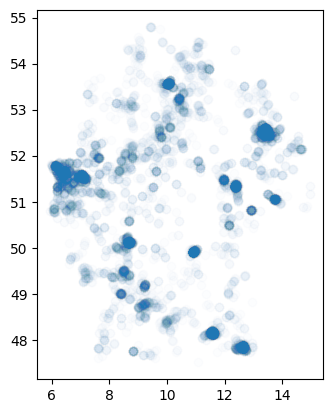

In [11]:
mapillary_trafficsigns_cw_temp.plot(alpha=0.01)

In [12]:
## now create a buffer around the traffic signs to check if there is a cycleway nearby
df_buffered = mapillary_trafficsigns_cw_temp.to_crs(25833).copy()
df_buffered["geometry"] = df_buffered.geometry.buffer(50)
df_buffered = df_buffered.to_crs(mapillary_trafficsigns_cw_temp.crs)


In [13]:
import geopandas as gpd

def mark_intersections(buffered_df, target_layer, column_name="has_intersection"):
    """
    Marks which geometries in `buffered_df` intersect with `target_layer`.

    Parameters:
    - buffered_df (GeoDataFrame): The GeoDataFrame containing buffered geometries.
    - target_layer (GeoDataFrame): The GeoDataFrame to check for intersections (e.g., cycleways, motorways).
    - column_name (str): Name of the column to add/overwrite in `buffered_df` indicating intersection (bool).

    Returns:
    - GeoDataFrame: `buffered_df` with a new boolean column `column_name`.
    """
    # Ensure CRS matches
    buffered_df = buffered_df.to_crs(target_layer.crs)

    # Perform spatial join to find intersecting geometries
    joined = gpd.sjoin(buffered_df, target_layer, how="inner", predicate="intersects")

    # Initialize the new column to False
    buffered_df[column_name] = False

    # Set True for geometries that intersect
    matches = joined.index.unique()
    buffered_df.loc[matches, column_name] = True

    return buffered_df


In [14]:
# For cycleways
df_buffered = mark_intersections(df_buffered, filtered_cycleways, column_name="has_cw_intersection")

# For motorways
df_buffered = mark_intersections(df_buffered, motorways, column_name="has_mw_intersection")


In [15]:
df_buffered

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cw_intersection,has_mw_intersection
241,"POLYGON ((9.73857 53.58523, 9.73857 53.58518, ...",2019-01-26,468313554240132,2025-05-08,regulatory--shared-path-pedestrians-and-bicycl...,8635,5292,True,False
700,"POLYGON ((9.78601 53.58059, 9.78602 53.58055, ...",2018-07-01,289630632817524,2025-05-08,regulatory--dual-path-pedestrians-and-bicycles...,8637,5292,True,False
764,"POLYGON ((9.79436 53.58067, 9.79436 53.58062, ...",2023-05-18,1205104076860311,2025-05-08,regulatory--bicycles-only--g1,8637,5292,True,False
765,"POLYGON ((9.79681 53.58056, 9.79681 53.58051, ...",2023-05-18,1205104120193640,2025-05-08,regulatory--bicycles-only--g1,8637,5292,True,False
794,"POLYGON ((9.78676 53.58053, 9.78677 53.58049, ...",2018-02-17,1376928219348628,2025-05-08,regulatory--bicycles-only--g1,8637,5292,True,False
...,...,...,...,...,...,...,...,...,...
6086759,"POLYGON ((8.89379 53.08235, 8.89379 53.08231, ...",2017-05-07,1797425837083672,2025-05-30,regulatory--bicycles-only--g1,8596,5330,True,False
6088161,"POLYGON ((8.90285 53.07266, 8.90286 53.07262, ...",2019-04-06,941758539953264,2025-05-16,regulatory--bicycles-only--g1,8597,5331,True,False
6088205,"POLYGON ((8.90261 53.07522, 8.90261 53.07518, ...",2019-04-06,466999907722714,2025-05-16,regulatory--bicycles-only--g1,8597,5331,True,False
6088216,"POLYGON ((8.90288 53.07288, 8.90288 53.07284, ...",2019-04-06,942332626562522,2025-05-16,regulatory--bicycles-only--g1,8597,5331,True,False


In [16]:


# Step 2: Ensure CRS matches
df_buffered = df_buffered.to_crs(filtered_cycleways.crs)

# Step 3: Perform spatial join (find intersecting geometries)
joined = gpd.sjoin(df_buffered, filtered_cycleways, how="inner", predicate="intersects")

# # Step 4: Mark which polygons had at least one intersection
# df_6months_30_buffered["has_30_intersection"] = df_6months_30_buffered.index.isin(joined.index)

# Zeilen, die mindestens einen Match haben
matches = joined.index.unique()

# Standardmäßig alles auf False setzen
df_buffered["has_cw_intersection"] = False

# Nur die gematchten Indizes auf True setzen
df_buffered.loc[matches, "has_cw_intersection"] = True



In [17]:
#df_buffered.id.unique()

In [18]:
df_buffered.has_cw_intersection.value_counts()

has_cw_intersection
True     10450
False      286
Name: count, dtype: int64

In [19]:
df_buffered.has_mw_intersection.value_counts()

has_mw_intersection
False    10624
True       112
Name: count, dtype: int64

In [20]:
((df_buffered.has_mw_intersection == False) & (df_buffered.has_cw_intersection == False)).sum()

np.int64(245)

In [21]:
df_buffered_false=df_buffered[(df_buffered.has_cw_intersection== False) & (df_buffered.has_mw_intersection== False)].copy()

In [22]:
df_buffered_false.explore(
    color="red",
    tiles="CartoDB positron",
    popup=True,
    tooltip=["value", "first_seen_at", "last_seen_at"]
)

In [23]:
df_buffered_false


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cw_intersection,has_mw_intersection
255441,"POLYGON ((13.22239 51.69078, 13.22239 51.69074...",2024-04-24,3594375670892463,2025-06-02,regulatory--dual-path-pedestrians-and-bicycles...,8793,5434,False,False
423998,"POLYGON ((14.08278 51.79137, 14.08278 51.79133...",2016-08-01,297068521878922,2025-08-03,regulatory--dual-path-bicycles-and-pedestrians...,8832,5427,False,False
517620,"POLYGON ((13.31502 52.47194, 13.31502 52.47189...",2020-12-30,314738270019841,2025-06-25,regulatory--bicycles-only--g1,8797,5376,False,False
616958,"POLYGON ((13.37533 52.42626, 13.37533 52.42621...",2021-09-12,1258970057865613,2025-02-22,regulatory--shared-path-pedestrians-and-bicycl...,8800,5380,False,False
627707,"POLYGON ((13.39275 52.57029, 13.39275 52.57024...",2022-03-30,170507565332643,2025-06-24,regulatory--shared-path-pedestrians-and-bicycl...,8801,5369,False,False
...,...,...,...,...,...,...,...,...,...
6006605,"POLYGON ((10.5497 52.95463, 10.5497 52.95458, ...",2018-11-17,222107232641846,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False
6006611,"POLYGON ((10.54865 52.95231, 10.54865 52.95226...",2023-09-28,1134483124180692,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False
6012585,"POLYGON ((10.58993 53.08901, 10.58993 53.08897...",2019-07-21,183063583714056,2025-05-07,regulatory--bicycles-only--g1,8673,5330,False,False
6013264,"POLYGON ((10.59033 53.07949, 10.59033 53.07944...",2020-02-08,1010860443020317,2025-05-07,regulatory--shared-path-pedestrians-and-bicycl...,8673,5331,False,False


In [24]:
## retrieve the image ID for the map features

In [25]:
import sys
import os
import json
import logging
from contextlib import contextmanager
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# -- suppress stdout context manager --
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# -- Load config & set Mapillary token --
with open("config_mapillary_privat.json", "r") as f:
    config = json.load(f)

access_token = config["ACCESS_TOKEN"]
mly.interface.set_access_token(access_token)

# -- Logging cleanup --
for name in logging.root.manager.loggerDict:
    logging.getLogger(name).setLevel(logging.WARNING)
logging.basicConfig(level=logging.ERROR)

# -- Your image fetching function --
def get_image_id(map_feature_id):
    try:
        feature_str = mly.interface.feature_from_key(key=str(map_feature_id))
        feature = json.loads(feature_str)
        images = feature["features"]["properties"]["images"]["data"]
        return images[-1]["id"] if images else None
    except Exception as e:
        return None  # Or log the error if needed

# -- Parallelized version using ThreadPoolExecutor --
def parallel_get_image_ids(ids, max_workers=8):
    results = [None] * len(ids)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(get_image_id, id_): idx for idx, id_ in enumerate(ids)}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching image IDs"):
            idx = futures[future]
            try:
                results[idx] = future.result()
            except Exception:
                results[idx] = None  # Or log
    return results

# -- Apply to your dataframe --
with suppress_stdout():
    df_buffered_false["image_id"] = parallel_get_image_ids(df_buffered_false["id"].tolist(), max_workers=5)  # Adjust max_workers as needed, 5 is fastest for me


Fetching image IDs: 100%|██████████| 245/245 [00:38<00:00,  6.28it/s]


In [26]:
df_buffered_false

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cw_intersection,has_mw_intersection,image_id
255441,"POLYGON ((13.22239 51.69078, 13.22239 51.69074...",2024-04-24,3594375670892463,2025-06-02,regulatory--dual-path-pedestrians-and-bicycles...,8793,5434,False,False,1203857974363031
423998,"POLYGON ((14.08278 51.79137, 14.08278 51.79133...",2016-08-01,297068521878922,2025-08-03,regulatory--dual-path-bicycles-and-pedestrians...,8832,5427,False,False,1242271282855827
517620,"POLYGON ((13.31502 52.47194, 13.31502 52.47189...",2020-12-30,314738270019841,2025-06-25,regulatory--bicycles-only--g1,8797,5376,False,False,945524602939552
616958,"POLYGON ((13.37533 52.42626, 13.37533 52.42621...",2021-09-12,1258970057865613,2025-02-22,regulatory--shared-path-pedestrians-and-bicycl...,8800,5380,False,False,546149316439959
627707,"POLYGON ((13.39275 52.57029, 13.39275 52.57024...",2022-03-30,170507565332643,2025-06-24,regulatory--shared-path-pedestrians-and-bicycl...,8801,5369,False,False,1336138853547382
...,...,...,...,...,...,...,...,...,...,...
6006605,"POLYGON ((10.5497 52.95463, 10.5497 52.95458, ...",2018-11-17,222107232641846,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,190122089627739
6006611,"POLYGON ((10.54865 52.95231, 10.54865 52.95226...",2023-09-28,1134483124180692,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,850980113061664
6012585,"POLYGON ((10.58993 53.08901, 10.58993 53.08897...",2019-07-21,183063583714056,2025-05-07,regulatory--bicycles-only--g1,8673,5330,False,False,312408083619370
6013264,"POLYGON ((10.59033 53.07949, 10.59033 53.07944...",2020-02-08,1010860443020317,2025-05-07,regulatory--shared-path-pedestrians-and-bicycl...,8673,5331,False,False,761646294497129


In [27]:
centroids = df_buffered_false.copy()
centroids=centroids.to_crs(25832)
centroids["geometry"] = centroids.geometry.centroid
centroids=centroids.to_crs(4326)

centroids

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cw_intersection,has_mw_intersection,image_id
255441,POINT (13.22167 51.69077),2024-04-24,3594375670892463,2025-06-02,regulatory--dual-path-pedestrians-and-bicycles...,8793,5434,False,False,1203857974363031
423998,POINT (14.08205 51.79137),2016-08-01,297068521878922,2025-08-03,regulatory--dual-path-bicycles-and-pedestrians...,8832,5427,False,False,1242271282855827
517620,POINT (13.31428 52.47193),2020-12-30,314738270019841,2025-06-25,regulatory--bicycles-only--g1,8797,5376,False,False,945524602939552
616958,POINT (13.37459 52.42625),2021-09-12,1258970057865613,2025-02-22,regulatory--shared-path-pedestrians-and-bicycl...,8800,5380,False,False,546149316439959
627707,POINT (13.39202 52.57028),2022-03-30,170507565332643,2025-06-24,regulatory--shared-path-pedestrians-and-bicycl...,8801,5369,False,False,1336138853547382
...,...,...,...,...,...,...,...,...,...,...
6006605,POINT (10.54896 52.9546),2018-11-17,222107232641846,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,190122089627739
6006611,POINT (10.5479 52.95228),2023-09-28,1134483124180692,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,850980113061664
6012585,POINT (10.58919 53.08898),2019-07-21,183063583714056,2025-05-07,regulatory--bicycles-only--g1,8673,5330,False,False,312408083619370
6013264,POINT (10.58958 53.07946),2020-02-08,1010860443020317,2025-05-07,regulatory--shared-path-pedestrians-and-bicycl...,8673,5331,False,False,761646294497129


In [28]:
# Mapping dictionary
value_to_vz = {
    'regulatory--dual-path-pedestrians-and-bicycles--g1': 241,
    'regulatory--dual-path-bicycles-and-pedestrians--g1': 241,
    'regulatory--bicycles-only--g1': 237,
    'regulatory--shared-path-pedestrians-and-bicycles--g1': 240
}

# Add new column based on mapping
centroids["VZ"] = centroids["value"].map(value_to_vz)

In [29]:
centroids

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cw_intersection,has_mw_intersection,image_id,VZ
255441,POINT (13.22167 51.69077),2024-04-24,3594375670892463,2025-06-02,regulatory--dual-path-pedestrians-and-bicycles...,8793,5434,False,False,1203857974363031,241
423998,POINT (14.08205 51.79137),2016-08-01,297068521878922,2025-08-03,regulatory--dual-path-bicycles-and-pedestrians...,8832,5427,False,False,1242271282855827,241
517620,POINT (13.31428 52.47193),2020-12-30,314738270019841,2025-06-25,regulatory--bicycles-only--g1,8797,5376,False,False,945524602939552,237
616958,POINT (13.37459 52.42625),2021-09-12,1258970057865613,2025-02-22,regulatory--shared-path-pedestrians-and-bicycl...,8800,5380,False,False,546149316439959,240
627707,POINT (13.39202 52.57028),2022-03-30,170507565332643,2025-06-24,regulatory--shared-path-pedestrians-and-bicycl...,8801,5369,False,False,1336138853547382,240
...,...,...,...,...,...,...,...,...,...,...,...
6006605,POINT (10.54896 52.9546),2018-11-17,222107232641846,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,190122089627739,241
6006611,POINT (10.5479 52.95228),2023-09-28,1134483124180692,2025-05-22,regulatory--dual-path-bicycles-and-pedestrians...,8672,5340,False,False,850980113061664,241
6012585,POINT (10.58919 53.08898),2019-07-21,183063583714056,2025-05-07,regulatory--bicycles-only--g1,8673,5330,False,False,312408083619370,237
6013264,POINT (10.58958 53.07946),2020-02-08,1010860443020317,2025-05-07,regulatory--shared-path-pedestrians-and-bicycl...,8673,5331,False,False,761646294497129,240


In [51]:
import uuid

def to_maproulette_geojson_with_links(gdf, id_field="id", name_field="value", image_field="image_id"):
    features = []

    for _, row in gdf.iterrows():
        geom = row.geometry
        centroid = geom.centroid
        lat, lon = round(centroid.y, 6), round(centroid.x, 6)

        # Optional: Mapillary image
        image_url = None
        image_id = None
        if pd.notna(row.get(image_field)):
            image_id = str(int(row[image_field]))
            image_url = (
                f"https://www.mapillary.com/app/?pKey={image_id}"
                "&focus=photo"
                "&trafficSign[]=regulatory--bicycles-only--g1"
                "&trafficSign[]=regulatory--shared-path-pedestrians-and-bicycles--g1"
                "&trafficSign[]=regulatory--dual-path-bicycles-and-pedestrians--g1"
                "&trafficSign[]=regulatory--dual-path-pedestrians-and-bicycles--g1"
            )

        # TILDA link
        tilda_url = f"https://tilda-geo.de/regionen/radinfra?map=17.4/{lat}/{lon}&config=pdqyyt.7h3d.16g9vk&v=2"

#         # Build instruction
#         instruction = f"""Check the area around this detected traffic sign: **{row["VZ"]}**.

# 📷 [View Mapillary image]({image_url})  (The initial showen image is not the newest, but there will be one from 2025 too)
# 🗺️ [Open in TILDA viewer]({tilda_url})


#  **Helpful Resources:**
#     - [Traffic Sign Tool](https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:{row["VZ"]})
#     - [OSM Wiki: Bicycle Infrastructure](https://wiki.openstreetmap.org/wiki/DE:Bicycle/Radverkehrsanlagen_kartieren)

# """

        instruction = f""".  
### 🚧 Aufgabe: Verkehrszeichen überprüfen – **{row["VZ"]}** und Radinfra hinzufügen
Bitte schaue dir den Bereich rund um dieses erkannte Verkehrszeichen an. Vermutlich fehlt hier eine Radinfrastruktur, die du hinzufügen kannst.

---

### 🖼️ Bild & Karte

- 📷 [**Mapillary-Bild anzeigen**]({image_url})  
(Hinweis: Das zuerst angezeigte Bild ist möglicherweise nicht das neueste – die neueste Aufnahme hier ist von **{row["last_seen_at"]})**

- 🗺️ [**In radinfra.de bzw TILDA ansehen**]({tilda_url})  
(Hinweis: Ist hilfreich um den aktuellen Stand der Radinfrastruktur vor Ort zu prüfen.)

---

### 📚 Nützliche Links

- 🛑 [**Traffic Sign Tool** – DE:{row["VZ"]}](https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:{row["VZ"]})  
- 🚴 [**OSM-Wiki: Radverkehrsanlagen kartieren**](https://wiki.openstreetmap.org/wiki/DE:Bicycle/Radverkehrsanlagen_kartieren)

---

Viel Erfolg beim Prüfen und Mappen! 🗺️
        """

        # Build properties
        props = {
            #"identifier": str(row[id_field]),
            "image_id": str(row[id_field]),
            "Verkehrzeichen": str(row["VZ"]),
            "instruction": instruction#.strip()
        }

        # Build feature
        feature = {
            "type": "Feature",
            "geometry": row["geometry"].__geo_interface__,
            "properties": props,
            # Set the top-level ID here
            "id": image_id
        }

        # # Add Mapillary attachment if available
        # if image_id:
        #     feature["attachments"] = [
        #         {
        #             "id": str(uuid.uuid4()),
        #             "kind": "referencePhoto",
        #             "type": "mapillary",
        #             "format": "image",
        #             "data": image_id
        #         }
        #     ]

        features.append(feature)

    return {
        "type": "FeatureCollection",
        "features": features
    }


In [52]:
# Convert your df_buffered_false (or any GeoDataFrame) to GeoJSON
maproulette_geojson = to_maproulette_geojson_with_links(centroids)

# Save to file
with open("maproulette_tasks_missing-cw_instruction_vz_name_new.geojson", "w") as f:
    json.dump(maproulette_geojson, f, indent=2)


In [ ]:
### Maproulette stuff....

In [ ]:
## Add missing cycleways based on mapillary signs (Germany)

In [ ]:
'''
Each task in this challenge includes its own specific instructions and links based on Mapillary and TILDA data. Please follow the individual guidance provided per task.

{{instruction}}
'''

In [ ]:

'''

Add missing cycleways based on Mapillary signs (Germany)

This task is based on detected cycleway-related traffic signs from Mapillary imagery in Germany.

Each task meets these strict conditions:

    The sign was captured in Mapillary.

    It represents a cycleway-related sign only (e.g., shared paths, bike-only paths).

    The sign is newer than 2025 and has been seen consistently for at least 12 months.

    There is no existing OSM cycleway within 50 meters of the sign location.

🔍 What you should do:

    Inspect the location in Mapillary, iD, or JOSM.

    Check for missing cycle infrastructure.

    If the sign implies a missing cycleway, add the appropriate OSM tagging (e.g., cycleway=*, highway=cycleway, etc.).

    If everything is already mapped correctly, you can mark the task as complete.

'''